<a href="https://colab.research.google.com/github/zohreh2016/Medical-Insurance-Primum-Prediction/blob/main/Medical_insurance_premium_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Data preprocessing

dataset: https://www.kaggle.com/mirichoi0218/insurance

1. Importing the libraries
2. Importing the dataset
3. Dealing with missing data
4. Encoding categorical variables
5. Splitting the dataset into train and test set
6. Feature scaling

## Importing the libraries and dataset

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
dataset = pd.read_csv('/content/insurance.csv')

In [25]:
dataset.head()
# we need to predict charges, we need to build a regression model

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
dataset.shape

(1338, 7)

## Data Expolration

In [27]:
# information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [28]:
# columns with categorical variables
dataset.select_dtypes(include = 'object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [29]:
# statistical summary
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Group the dataset by 'sex', 'smoker' and 'region'

In [30]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
dataset.groupby(by='sex'). mean()


,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


there is no difference between age , bmi, and children for femal or maleto affect charges

In [32]:
dataset.groupby(by='smoker').mean()


,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


 here also age bmi and children for no smoker and smoker are not that different BUT here is an interesting insight for charges!!! a huge diffenrce between charges for somkers and non smokers.

In [33]:
dataset.groupby(by='region').mean()

# Seems like south east region has the highest charges and body mass index

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


## Dealing with the missing data

In [34]:
# check if there are any null values
dataset.isnull().values.any()

False

In [35]:
# check how many null values
dataset.isnull().values.sum()

0

## Encoding the categorical data

In [36]:
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [37]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [39]:
len(dataset.select_dtypes(include='object').columns)

3

In [40]:
# check unique values in each column

In [41]:
# Check the unique values in column 'sex'
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [42]:
# Check the unique values in column 'smoker'
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [43]:
# Check the unique values in column 'region'
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [44]:
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [47]:
dataset.head(10)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
5,31,25.740,0,3756.62160,0,0,0,1,0
6,46,33.440,1,8240.58960,0,0,0,1,0
7,37,27.740,3,7281.50560,0,0,1,0,0
8,37,29.830,2,6406.41070,1,0,0,0,0
9,60,25.840,0,28923.13692,0,0,1,0,0


In [46]:
dataset.shape

(1338, 9)

## Correlation matrix and Heatmap

In [48]:
dataset_2 = dataset.drop(columns='charges')

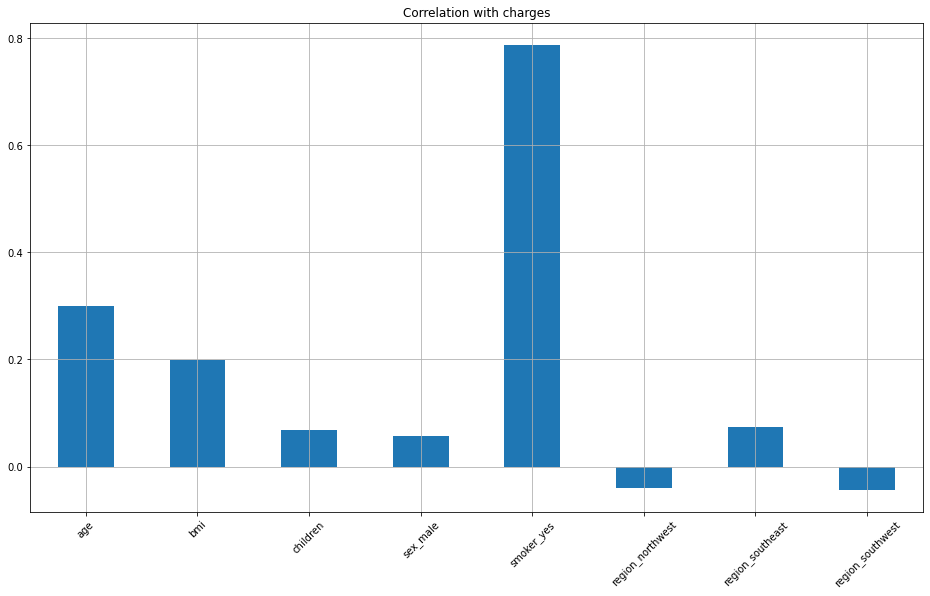

In [49]:
dataset_2.corrwith(dataset['charges']).plot.bar(
    figsize=(16,9), title = 'Correlation with charges', 
    rot = 45, grid = True
)

In [50]:
# Create Correlation Matrix
corr = dataset.corr()

In [51]:
corr

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


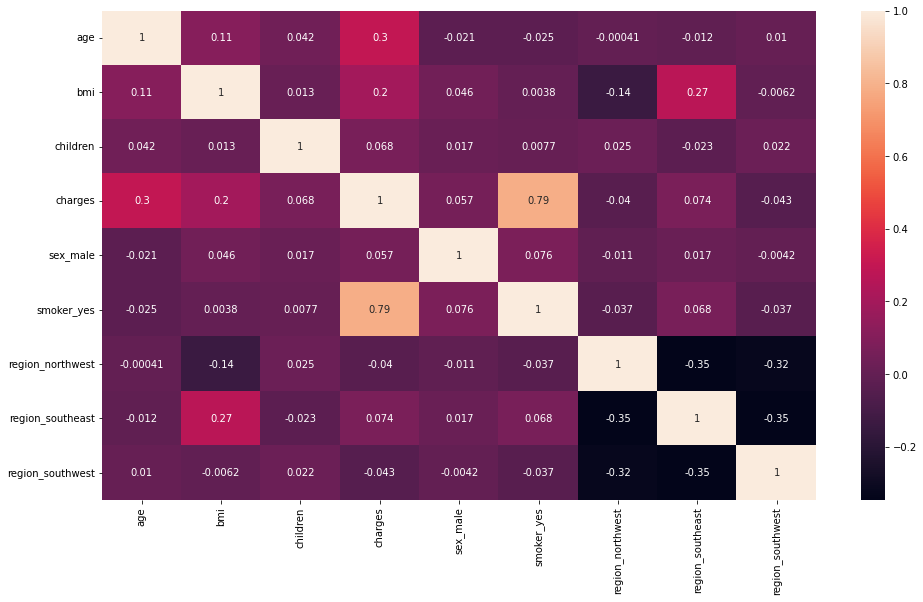

In [52]:
# correlation matrix
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

## Splitting the dataset into train and test set

In [53]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [54]:
# matrix of features / inependent variables
x = dataset.drop(columns='charges')

In [55]:
# dependent variable vector
y = dataset['charges']

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [57]:
x_train.shape

(1070, 8)

In [58]:
x_test.shape

(268, 8)

In [59]:
y_train.shape

(1070,)

In [60]:
y_test.shape

(268,)

## Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#apply feature scaling
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [69]:
 x_train

array([[ 0.77204804,  2.27803233, -0.09400549, ..., -0.57663083,
         1.62845851, -0.56655772],
       [-1.29353661,  0.98894385, -0.91847983, ..., -0.57663083,
         1.62845851, -0.56655772],
       [ 0.20223159,  1.71731139, -0.09400549, ..., -0.57663083,
        -0.61407766, -0.56655772],
       ...,
       [-1.43599072, -0.81854699, -0.09400549, ...,  1.73421182,
        -0.61407766, -0.56655772],
       [ 0.70082099,  0.95313584,  1.55494321, ..., -0.57663083,
         1.62845851, -0.56655772],
       [-0.51003898,  0.38753199,  1.55494321, ...,  1.73421182,
        -0.61407766, -0.56655772]])

In [70]:
x_test

array([[ 0.41591276,  1.50083568,  1.55494321, ..., -0.57663083,
        -0.61407766, -0.56655772],
       [-1.07985544, -0.64845893, -0.09400549, ...,  1.73421182,
        -0.61407766, -0.56655772],
       [-1.43599072,  0.38020763, -0.91847983, ..., -0.57663083,
         1.62845851, -0.56655772],
       ...,
       [ 0.27345865, -0.10726964,  1.55494321, ...,  1.73421182,
        -0.61407766, -0.56655772],
       [-1.07985544,  0.04735587, -0.91847983, ..., -0.57663083,
        -0.61407766, -0.56655772],
       [ 0.3446857 , -0.53289671, -0.09400549, ..., -0.57663083,
        -0.61407766,  1.76504522]])

# 2- Building the model

## 1.Multiple linear regression

In [71]:
# linear regression model
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(x_train, y_train)

LinearRegression()

In [72]:
y_pred = regressor_lr.predict(x_test)

In [73]:
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [74]:
# To analysis our model we use R squre:  best value is 1. the value can be negative.
#R^2 (coefficient of determination) regression score function
# R^2 = 1 − sum squared regression: The sum squared regression is the sum of the residuals squared: 1 − ∑ ( y i − y i ^ ) 


from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7738683577126552

## 2.Random forest regression

In [65]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [66]:
y_pred = regressor_rf.predict(x_test)

In [67]:
# R^2 (coefficient of determination) regression score function
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8434150037597731

## 3.XGBoost regression

In [78]:
from xgboost import XGBRFRegressor
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(x_train,y_train)

[21:14:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor()

In [79]:
y_pred = regressor_xgb.predict(x_test)

In [80]:
# R^2 (coefficient of determination) regression score function
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8685634057817854

# 3- Predict charges for a new customer

In [ ]:
# case 1: Name: Frank, age: 40, sex: 1, bmi:45.50, children:4, smoker:1, region:northeast

In [81]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [82]:
data = {'age':40,
        'bmi':45.50,
        'children':4,
        'sex':1,       
        'smoker':1,
        'region_northwest':0,
        'region_southeast':0,
        'region_southwest':0
}

In [84]:
df_frank = pd.DataFrame(data=data, index=[1])

In [85]:
df_frank

,age,bmi,children,sex,smoker,region_northwest,region_southeast,region_southwest
1,40,45.5,4,1,1,0,0,0


In [88]:
# or we can have it like: 
frank_obs=[[40,	45.5,	4,	1,	1,	0,	0,	0]]

In [89]:
frank_pred = regressor_xgb.predict(frank_obs)

In [90]:
frank_pred

array([41911.582], dtype=float32)